In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

## Датасет

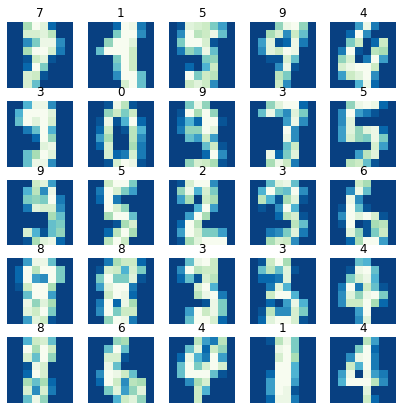

In [2]:
digits = load_digits()
X = digits.data
labels = digits.target
fig, axs = plt.subplots(5, 5, figsize=(7, 7))
for i in range(5):
    for j in range(5):
        k = np.random.randint(0, 1797)
        axs[i, j].imshow(X[k,:].reshape(8, 8), cmap = 'GnBu_r')
        axs[i, j].set_title(labels[k])
        axs[i, j].axis('off')

## Алгоритм PCA

In [59]:
class my_PCA(): 
    def __init__(self, n_components=None): 
        self.n_components = n_components  
    def fit(self, X): 
        X_c = X - X.mean(axis=0)
        C = X_c.T.dot(X_c) / (len(X_c) - 1)
        eig_val, F = np.linalg.eig(C)
        return X_c, eig_val, F    
    def transform(self, X):
        X_c, eig_val, F = self.fit(X)
        return X_c @ F[:, : self.n_components]
    def fit_transform(X): 
        fit()
        transform()
        pass

In [60]:
PCA = my_PCA()
X_c, eig_val, F = PCA.fit(X)
eig_val

array([1.79006930e+02, 1.63717747e+02, 1.41788439e+02, 1.01100375e+02,
       6.95131656e+01, 5.91085249e+01, 5.18845391e+01, 4.40151067e+01,
       4.03109953e+01, 3.70117984e+01, 2.85190412e+01, 2.73211698e+01,
       2.19014881e+01, 2.13243565e+01, 1.76367222e+01, 1.69468639e+01,
       1.58513899e+01, 1.50044602e+01, 1.22344732e+01, 1.08868593e+01,
       1.06935663e+01, 9.58259779e+00, 9.22640260e+00, 8.69036872e+00,
       8.36561190e+00, 7.16577961e+00, 6.91973881e+00, 6.19295508e+00,
       5.88499123e+00, 5.15586690e+00, 4.49129656e+00, 4.24687799e+00,
       4.04743883e+00, 3.94340334e+00, 3.70647245e+00, 3.53165306e+00,
       3.08457409e+00, 2.73780002e+00, 2.67210896e+00, 2.54170563e+00,
       2.28298744e+00, 1.90724229e+00, 1.81716569e+00, 1.68996439e+00,
       1.40197220e+00, 1.29221888e+00, 1.15893419e+00, 9.31220008e-01,
       6.69850594e-01, 4.86065217e-01, 2.52350432e-01, 9.91527944e-02,
       6.31307848e-02, 6.07377581e-02, 3.96662297e-02, 1.49505636e-02,
      

График собственных значений

Text(0, 0.5, 'Собственные значения')

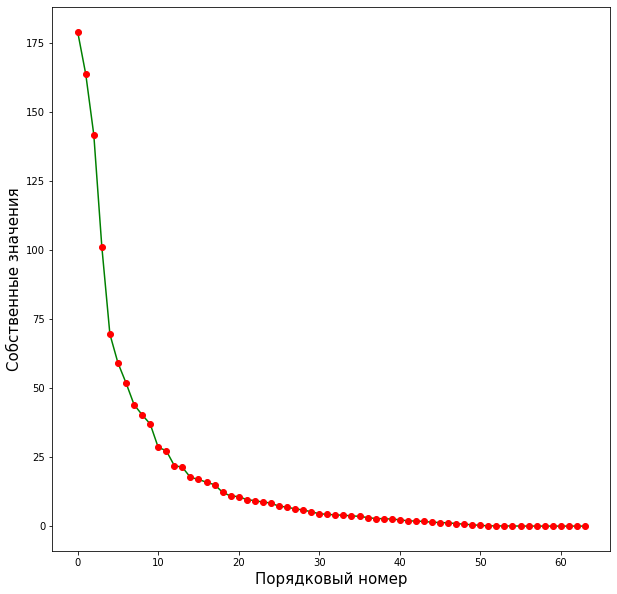

In [61]:
x = eig_val
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(x, color = 'green')
ax.plot(x, 'o', color = 'red')
ax.set_xlabel('Порядковый номер', fontsize=15)
ax.set_ylabel('Собственные значения', fontsize=15)

График отношения кумулятивной суммы собственных значений к их полной сумме

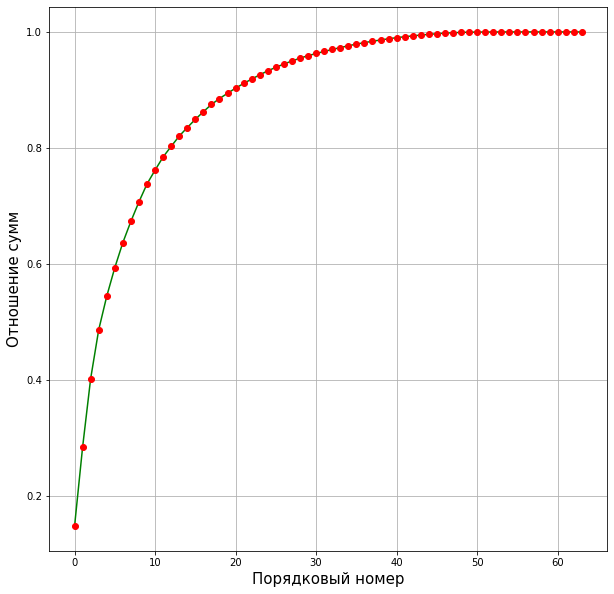

In [62]:
x = np.cumsum(eig_val) / np.sum(eig_val)
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(x, color = 'green')
ax.plot(x, 'o', color = 'red')
ax.set_xlabel('Порядковый номер', fontsize=15)
ax.set_ylabel('Отношение сумм', fontsize=15)
ax.grid()

Первые 15 главных компонент покрывают более 80% дисперсии данных. Собственные числа являются квадратами соответсвующих дисперсий данных 

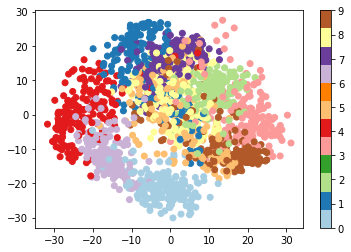

In [63]:
X_ = PCA.transform(X)
plt.scatter(X_[:, 0], X_[:, 1], c=labels, cmap='Paired')
plt.colorbar()

В первых двух координатах главных компонент точки, принадлежащие разным классам, расположены близко к друг другу, достаточно четко сгруппированы. Нельзя сказать, что они отчетливо линейно разделены, но всё же классы хорошо просматриваются.

## Алгоритм kNN

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X_train, X_test, labels_train, labels_test = train_test_split(X, labels, shuffle=False)

In [10]:
class my_kNN(): 
    def __init__(self, n_neighbors=5): 
        self.n_neighbors = n_neighbors  
    def fit(self, X, y): 
        self.X_train = X
        self.y_train = y
        return    
    def predict(self, X): 
        y_pred = []
        for i in range(len(X)):
            l = list()
            for j in range(len(self.X_train)):
                l.append(np.sqrt(np.sum((self.X_train[j] - X[i]) ** 2)))
            l = list(enumerate(l))
            lng = sorted(l, key = lambda l : l[1])
            min_lng = lng[:self.n_neighbors]
            neighbs = dict(min_lng)
            index = list(neighbs.keys())
            y_prob = np.zeros(len(index))
            for k in range(len(index)):
                y_prob[k] = int(self.y_train[index[k]])
            y_prob = np.array(y_prob, dtype='int')
            y_pred.append(np.bincount(y_prob).argmax())
        return y_pred

In [12]:
knn = my_kNN(n_neighbors = 5)
knn.fit(X_train, labels_train)
labels_pred = knn.predict(X_test)
print('Точность:', accuracy_score(labels_test, labels_pred) * 100)

Точность: 96.44444444444444


In [13]:
PCA_new = my_PCA(n_components = 2)
X_new = PCA_new.transform(X)
X_train_new, X_test_new, labels_train_new, labels_test_new = train_test_split(X_new, labels, shuffle = False)

In [15]:
acc = 0
for i in range(1, 31):
    knn_new = my_kNN(n_neighbors = i)
    knn_new.fit(X_train_new, labels_train_new)
    labels_pred_new = knn_new.predict(X_test_new)
    res = accuracy_score(labels_test_new, labels_pred_new) * 100
    if res > acc:
        acc = res
        neigb = i
print('Точность при двух компонентах:', acc, 'Число соседей:', neigb)

Точность при двух компонентах: 64.22222222222223 Число соседей: 29


In [16]:
PCA_new = my_PCA(n_components = 15)
X_new = PCA_new.transform(X)
X_train_new, X_test_new, labels_train_new, labels_test_new = train_test_split(X_new, labels, shuffle = False)

In [17]:
acc = 0
for i in range(1, 31):
    knn_new = my_kNN(n_neighbors = i)
    knn_new.fit(X_train_new, labels_train_new)
    labels_pred_new = knn_new.predict(X_test_new)
    res = accuracy_score(labels_test_new, labels_pred_new) * 100
    if res > acc:
        acc = res
        neigb = i
print('Точность при 15 компонентах:', acc, 'Число соседей:', neigb)

Точность при 15 компонентах: 96.22222222222221 Число соседей: 1


In [18]:
acc = 0
for j in range(1, 65):
    PCA_new = my_PCA(n_components = j)
    X_new = PCA_new.transform(X)
    X_train_new, X_test_new, labels_train_new, labels_test_new = train_test_split(X_new, labels, shuffle = False)
    for i in range(5, 8):
        knn_new = my_kNN(n_neighbors = i)
        knn_new.fit(X_train_new, labels_train_new)
        labels_pred_new = knn_new.predict(X_test_new)
        res = accuracy_score(labels_test_new, labels_pred_new) * 100
        if res > acc:
            acc = res
            comps = j
            neigb = i
print('Точность:', acc, 'Число компонент:', comps, 'Число соседей:', neigb)

Точность: 97.11111111111111 Число компонент: 16 Число соседей: 6


In [19]:
acc = list()
comps = list()
neighbs = list()
for j in range(1, 65, 4):
    PCA_new = my_PCA(n_components = j)
    X_new = PCA_new.transform(X)
    X_train_new, X_test_new, labels_train_new, labels_test_new = train_test_split(X_new, labels, shuffle = False)
    for i in range(1, 31, 2):
        knn_new = my_kNN(n_neighbors = i)
        knn_new.fit(X_train_new, labels_train_new)
        labels_pred_new = knn_new.predict(X_test_new)
        res = accuracy_score(labels_test_new, labels_pred_new) * 100
        acc.append(res)
        comps.append(j)
        neighbs.append(i)

Text(0.5, 0, 'Число соседей')

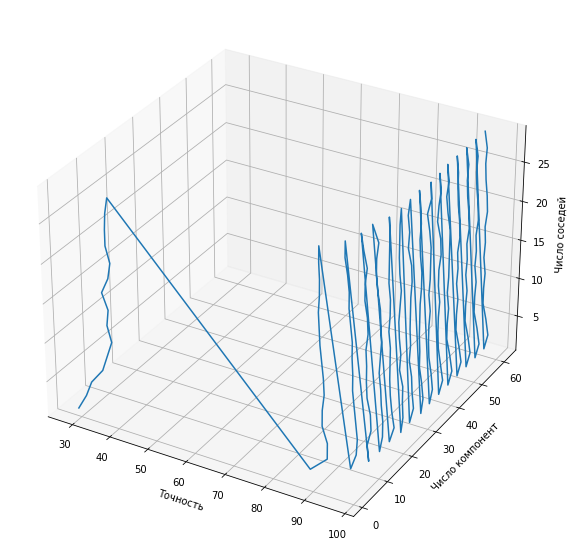

In [49]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(acc, comps, neighbs)
ax.set_xlabel('Точность')
ax.set_ylabel('Число компонент')
ax.set_zlabel('Число соседей')

Примерно начиная с 10 компонент точность при любом числе соседей составляет стабильно больше 90%.

In [37]:
i = 0
while acc[i] < 90:
    i += 1
i, acc[i]

(16, 90.22222222222223)

In [33]:
comps[16], neighbs[16]

(5, 3)

Точность больше 90% может достигаться всего при 5 компонентах PCA и 3 соседях kNN

In [38]:
ac = np.array(acc)
ac.max(), ac.argmax()

(97.11111111111111, 151)

In [39]:
comps[151], neighbs[151]

(41, 3)

Наибольшая выявленная точность - 97,1%. Она может достигаться оптимальнее при 16 компонентах и 6 соседях.